# Ipl Data Set Analysis

- I got the data from https://www.kaggle.com/manasgarg/ipl

# imports

In [1]:
import pandas as pd
%matplotlib inline

In [2]:
pd.options.display.max_columns = 999

# Read Data

In [3]:
matches = pd.read_csv('data/ipl/matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# insights

- Matches win per team
- %age of wins while batting first
- %age of matches which applied d/l method
- Matches wining per team per season `[2013 , 2014]`
- MoM vs Player graph, across all season, decending order.
- MoM vs Player graph, `[2010, 2011]`

# Matches wining per team per season [2013 , 2014]

# 2013

In [4]:
matches.id.dtypes

dtype('int64')

In [5]:
# filter 2013 data
matches_2013 = matches[matches.season == 2013]
matches_2013.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel,NaN
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin,NaN
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel,NaN
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin,NaN
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni,NaN


In [6]:
winners_2013 = matches_2013.groupby('winner')['winner'].count()
winners_2013

winner
Chennai Super Kings            12
Delhi Daredevils                3
Kings XI Punjab                 8
Kolkata Knight Riders           6
Mumbai Indians                 13
Pune Warriors                   4
Rajasthan Royals               11
Royal Challengers Bangalore     9
Sunrisers Hyderabad            10
Name: winner, dtype: int64

In [7]:
winners_2013_desc = winners_2013.sort_values(ascending=False)
winners_2013_desc

winner
Mumbai Indians                 13
Chennai Super Kings            12
Rajasthan Royals               11
Sunrisers Hyderabad            10
Royal Challengers Bangalore     9
Kings XI Punjab                 8
Kolkata Knight Riders           6
Pune Warriors                   4
Delhi Daredevils                3
Name: winner, dtype: int64

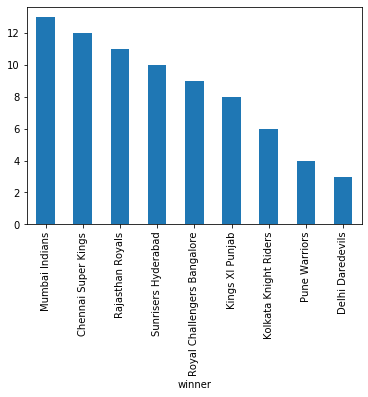

In [8]:
winners_2013_desc.plot(kind='bar')

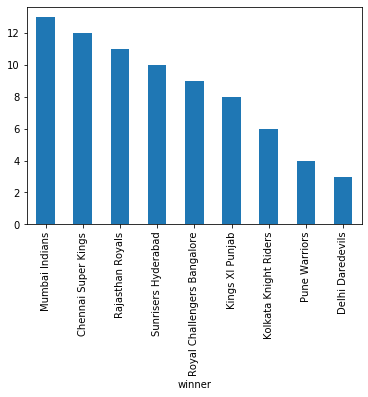

In [9]:
# data for 2013
matches_2013 = matches[matches.season == 2013]
winners_2013 = matches_2013.groupby('winner')['winner'].count()
winners_2013_desc = winners_2013.sort_values(ascending=False)
winners_2013_desc.plot(kind='bar')

In [10]:
matches.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [11]:
deliveries = pd.read_csv('data/ipl/deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# Insights

- Batsmen vs Runs ( Sort in Descending Order )
- Bowler vs Wickets ( Sort in Descending Order )
- Bowler vs Extra Runs ( Sort in Descending Order )
- Most number of no balls vs bowler ( Descending Order )
- 4's vs Batsmen
- 6's vs Batsmen

# Bowler vs Wickets ( Sort in Descending Order )

In [12]:
bowler_wickets = deliveries.groupby('bowler').player_dismissed.count()
bowler_wickets

bowler
A Ashish Reddy        19
A Chandila            11
A Choudhary            5
A Flintoff             2
A Kumble              49
A Mishra             142
A Mithun               8
A Nehra              121
A Nel                  1
A Singh               31
A Symonds             23
A Uniyal               3
A Zampa               19
AA Chavan              8
AA Jhunjhunwala        1
AA Kazi                1
AA Noffke              1
AB Agarkar            33
AB Dinda              82
AB McDonald           14
AC Gilchrist           1
AC Thomas             16
AC Voges               1
AD Mascarenhas        19
AD Mathews            28
AD Russell            36
AF Milne               5
AG Murtaza            12
AJ Finch               1
AJ Tye                12
                    ... 
TG Southee            25
TL Suman               7
TM Dilshan             5
TM Head                3
TP Sudhindra           1
TS Mills               5
Tejas Baroka           0
UT Yadav             107
Umar Gul          

In [13]:
top_10_bowler = bowler_wickets.sort_values(ascending=False)[0:10]
top_10_bowler

bowler
SL Malinga         170
A Mishra           142
DJ Bravo           137
Harbhajan Singh    136
PP Chawla          133
R Vinay Kumar      125
A Nehra            121
Z Khan             119
B Kumar            117
R Ashwin           110
Name: player_dismissed, dtype: int64

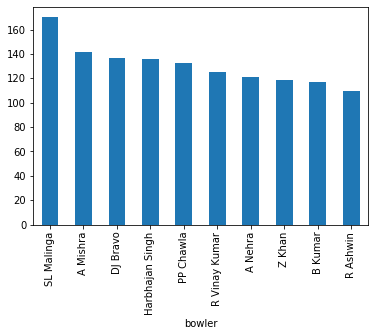

In [14]:
top_10_bowler.plot(kind='bar')

# next data set
https://www.kaggle.com/rajanand/crime-in-india/download